In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *
import numpy as np
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator

In [2]:
df = pd.read_csv("exp8_clean_data.csv",header=0)
df2 = pd.read_csv("exp8_clean_data2.csv",header=0)
df3 = pd.read_csv("exp8_merged_on_SNP_records2.csv",delimiter="\t",header=None)

In [3]:
df2.head()

,Unnamed: 0,AGGNo,LLR T1,LLR T2,LLR T3,RTI T2,RTI T3,AGG No.,Varma code,Struct_pop,Species
0,0,50005,73.196307,62.315905,26.429371,0.851353,0.361075,50005.0,Oyali_073,Ret_1,reticulatum
1,1,50015,84.526210,74.003644,38.044152,0.875511,0.450087,50015.0,Oyali_100,Ret_1,reticulatum
2,2,49787,86.198744,75.572994,39.631012,0.876730,0.459763,49787.0,Bari1_062,Ret_8,reticulatum
3,3,49805,87.694025,76.924233,41.069343,0.877189,0.468325,49805.0,Bari2_064,Ret_7,reticulatum
4,4,49799,88.516529,77.820297,41.866506,0.879161,0.472980,49799.0,Bari1_092,Ret_8,reticulatum


In [15]:
df2['Varma code']=df2['Varma code'].fillna(df2.AGGNo)

# dot plot in pairgrid

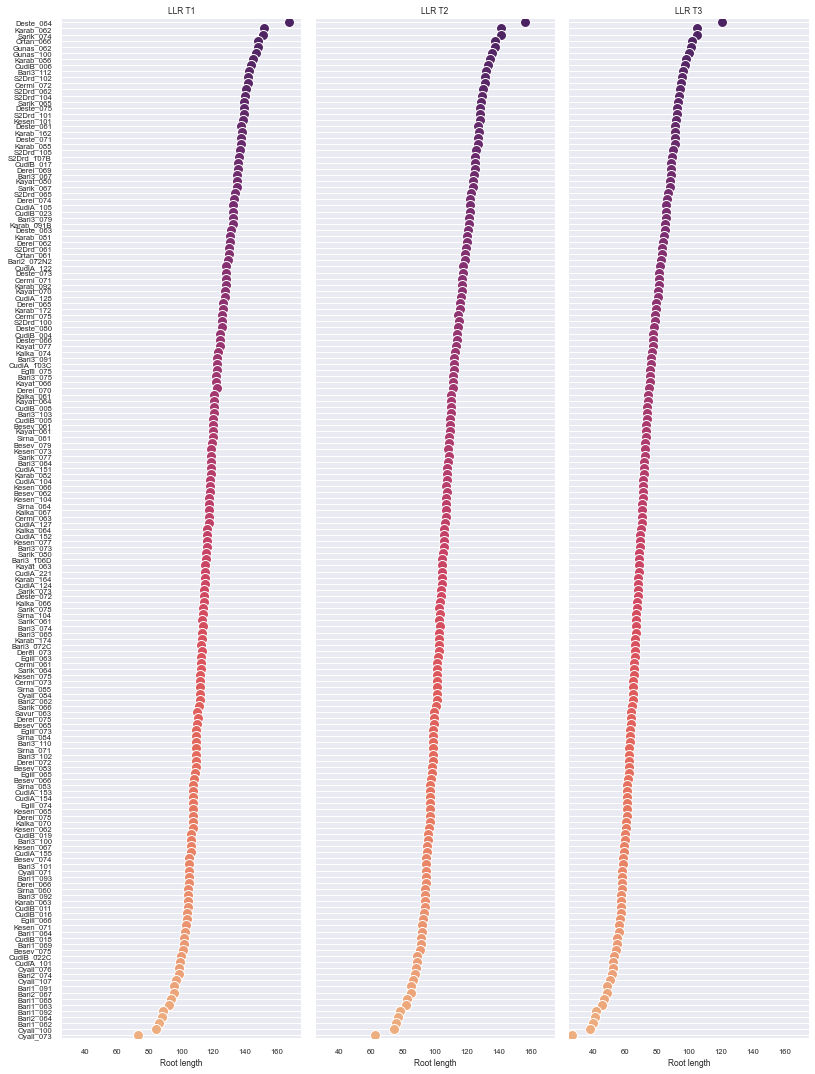

In [27]:
sns.set_theme(style="whitegrid")
sns.set(font_scale = 0.7)
# Make the PairGrid
g = sns.PairGrid(df2.sort_values("LLR T3", ascending=False),
                 x_vars=df2.columns[2:5], y_vars=["Varma code"],
                 height=15, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(25, 175), xlabel="Root length", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["LLR T1","LLR T2","LLR T3"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

# lolliplot

In [28]:
df2.head()

,Unnamed: 0,AGGNo,LLR T1,LLR T2,LLR T3,RTI T2,RTI T3,AGG No.,Varma code,Struct_pop,Species
0,0,50005,73.196307,62.315905,26.429371,0.851353,0.361075,50005.0,Oyali_073,Ret_1,reticulatum
1,1,50015,84.526210,74.003644,38.044152,0.875511,0.450087,50015.0,Oyali_100,Ret_1,reticulatum
2,2,49787,86.198744,75.572994,39.631012,0.876730,0.459763,49787.0,Bari1_062,Ret_8,reticulatum
3,3,49805,87.694025,76.924233,41.069343,0.877189,0.468325,49805.0,Bari2_064,Ret_7,reticulatum
4,4,49799,88.516529,77.820297,41.866506,0.879161,0.472980,49799.0,Bari1_092,Ret_8,reticulatum


In [46]:
df2.shape

(212, 11)

In [15]:
df2['Varma code']=df2['Varma code'].fillna(df2.AGGNo)

In [24]:
df2.to_csv("test.csv")

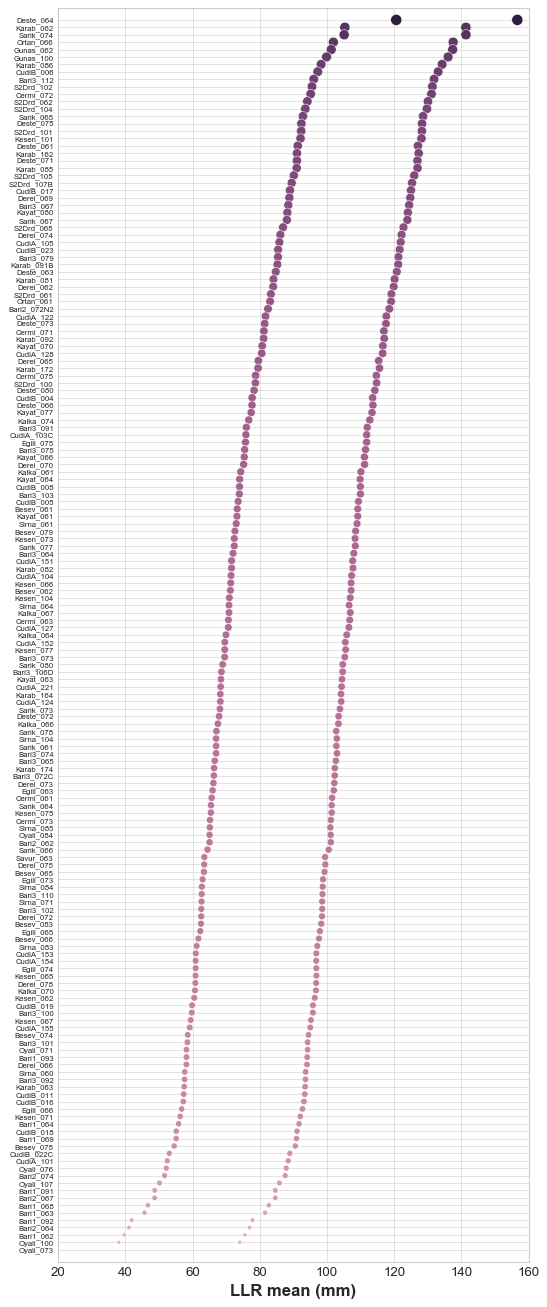

In [53]:
fig,ax=plt.subplots(1,1,figsize=(6,16))
ordered_df = df2.sort_values(by='LLR T3',ascending=False)

sns.scatterplot(ax=ax, data=ordered_df,y="Varma code", x="LLR T3", hue="LLR T3", size="LLR T3",sizes=(0,100),\
               legend=False)

sns.scatterplot(ax=ax, data=ordered_df,y="Varma code", x="LLR T2", hue="LLR T2", size="LLR T2",sizes=(0,100),\
               legend=False)
## sizes adjusted based max value in two dataset

##hide x y labels
ax.set_ylabel('', fontsize=15)
ax.set(xlim=(20, 160))
plt.xlabel("LLR mean (mm)", fontsize=15,fontweight='bold')

## add shared labels
#fig.text(0.5, 0.04, 'common X', ha='center')
#fig.text(-0.04, 0.5, 'Oganic acids', va='center', rotation='vertical',fontsize=15,fontweight='bold') ##

ax.margins(0,0.01)
plt.setp(ax.get_yticklabels(), fontsize=7)

plt.show()

In [59]:
df2.head(2)

,Unnamed: 0,AGGNo,LLR T1,LLR T2,LLR T3,RTI T2,RTI T3,AGG No.,Varma code,Struct_pop,Species
0,0,50005,73.196307,62.315905,26.429371,0.851353,0.361075,50005.0,Oyali_073,Ret_1,reticulatum
1,1,50015,84.526210,74.003644,38.044152,0.875511,0.450087,50015.0,Oyali_100,Ret_1,reticulatum


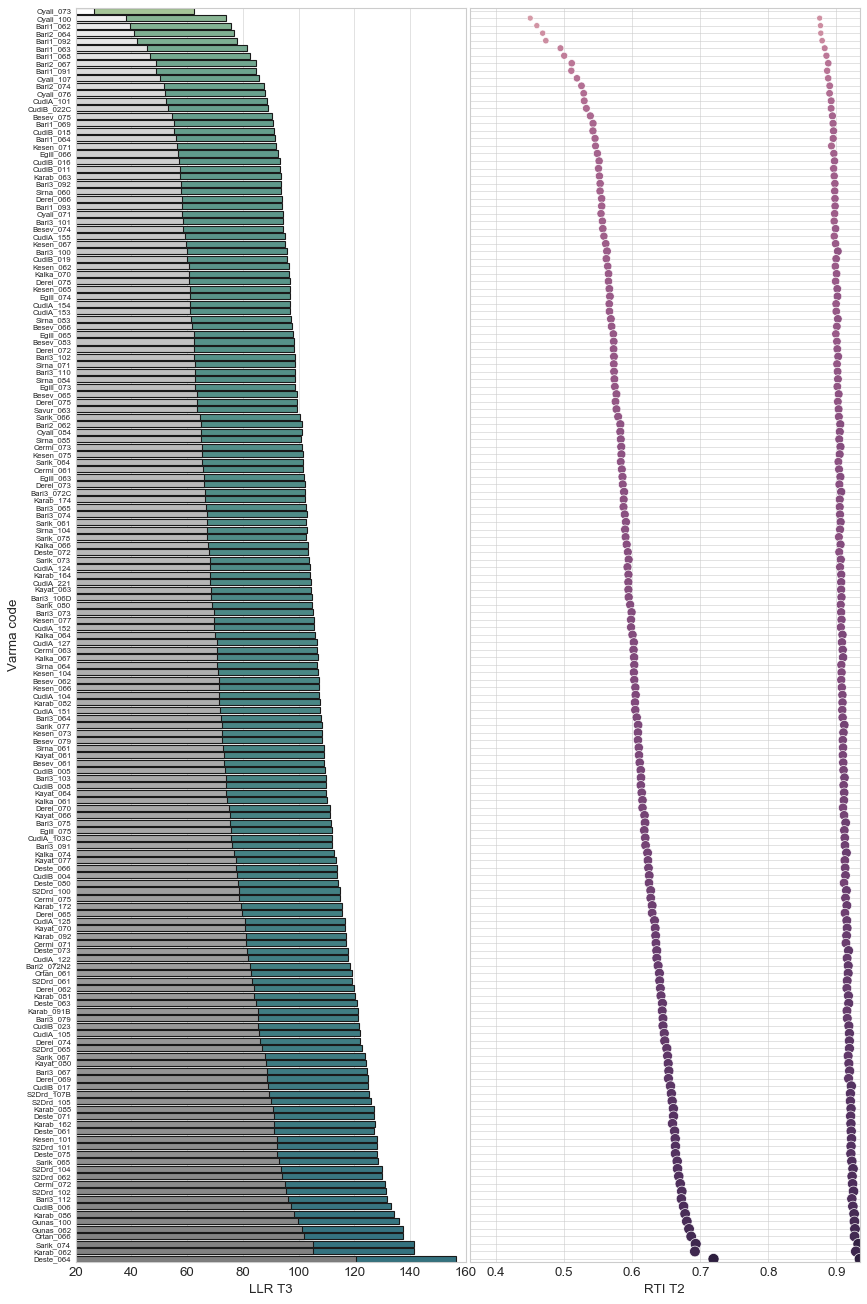

In [73]:
plt.style.use("seaborn-whitegrid")
fig,ax=plt.subplots(1,2,figsize=(10,16),sharey=True)

# Reorder it following the values of the first value:
ordered_df = df2.sort_values(by='LLR T3')
my_range=range(1,len(df2.index)+1)
 
# The horizontal plot is made using the hline function
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

cc0=ordered_df["LLR T2"].values
sns.barplot(ax=ax[0], x="LLR T2", y="Varma code", data=ordered_df,
            label="LLR T2", palette=colors_from_values(cc0, "crest"))
cc1=ordered_df["LLR T3"].values
sns.barplot(ax=ax[0], x="LLR T3", y="Varma code", data=ordered_df,
            label="LLR T3", palette=colors_from_values(cc1, "Greys"))

#ax[1].hlines(y=my_range, xmin=ordered_df['RTI T3'], xmax=ordered_df['RTI T2'], color='grey', alpha=0.4)
sns.scatterplot(ax=ax[1], data=ordered_df,y="Varma code", x="RTI T2", hue="RTI T2", size="RTI T2",sizes=(0,100),\
               legend=False)
sns.scatterplot(ax=ax[1], data=ordered_df,y="Varma code", x="RTI T3", hue="RTI T3", size="RTI T2",sizes=(0,100),\
               legend=False)
 
# Add title and axis names
ax[0].margins(0,0)
ax[1].margins(0,0)
ax[0].set(xlim=(20, 160))
#ax[0].set_yticks(my_range, ordered_df['Varma code'])
plt.setp(ax[0].get_yticklabels(), fontsize=7)
plt.subplots_adjust(wspace=0.01)
#ax[0].title("Longest length root", loc='left')
#plt.xlabel('Root length mean')
#plt.ylabel('Name')

# Show the graph
plt.show()

In [5]:
dfC=pd.read_csv("colors.csv")
dfC.shape

(209, 3)

In [6]:
colors=dfC.Colors.to_list()

In [7]:
len(colors)

209

In [10]:
df2.shape

(209, 11)

In [11]:
ordered_df.shape

(209, 11)

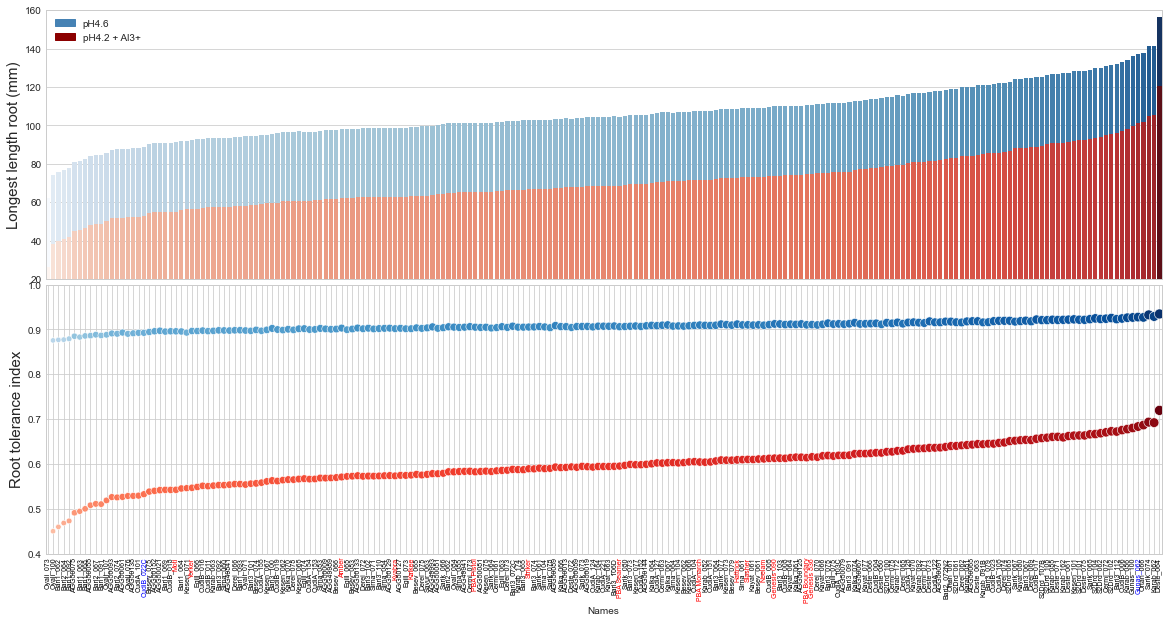

In [17]:
import matplotlib.patches as mpatches
plt.style.use("seaborn-whitegrid")
fig,ax=plt.subplots(2,1,figsize=(20,10),sharex=True)

# Reorder it following the values of the first value:
ordered_df = df2.sort_values(by='LLR T3')
my_range=range(1,len(df2.index)+1)
 
# The horizontal plot is made using the hline function
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

cc0=ordered_df["LLR T2"].values
sns.barplot(ax=ax[0], y="LLR T2", x="Varma code", data=ordered_df,
            label="Longest length root (mm)", palette=colors_from_values(cc0, "Blues"))
cc1=ordered_df["LLR T3"].values
sns.barplot(ax=ax[0], y="LLR T3", x="Varma code", data=ordered_df,
            label="Longest length root (mm)", palette=colors_from_values(cc1, "Reds"))


sns.scatterplot(ax=ax[1], data=ordered_df,x="Varma code", y="RTI T2", hue="RTI T2", size="RTI T2",sizes=(0,100),\
               legend=False, palette= "Blues")

sns.scatterplot(ax=ax[1], data=ordered_df,x="Varma code", y="RTI T3", hue="RTI T3", size="RTI T2",sizes=(0,100),\
               legend=False, palette="Reds")
 
# Range and margins
ax[0].margins(0,0)
ax[1].margins(0,0)
ax[0].set(ylim=(20, 160))
ax[1].set(ylim=(0.4, 1))

#legend
patch1 = mpatches.Patch(color='steelblue', label='pH4.6')
patch2 = mpatches.Patch(color='darkred', label='pH4.2 + Al3+')
ax[0].legend(handles=[patch1,patch2])

#labels
ax[0].set_ylabel("Longest length root (mm)",fontsize=15)
ax[0].set_xlabel("")
ax[1].set_ylabel("Root tolerance index",fontsize=15)
ax[1].set_xlabel("Names")
plt.setp(ax[1].get_xticklabels(), fontsize=7,rotation=90)
#fig.text(0.4, 0.98, 'Longest length root', va='center', fontsize=15,fontweight='bold') ##
#ax[0].set_title("test",x=0.4,y=0.9,fontsize=15,fontweight='bold')

#xticklabels color
for i in np.arange(0,209):
    color=colors[i]
    t=ax[1].xaxis.get_ticklabels()[i]
    t.set_color(color)

#layout
plt.subplots_adjust(hspace=0.02)

# Show the graph
plt.show()

In [18]:
fig.savefig("Exp8_T2T3_distribution5.png",dpi=300,bbox_inches = 'tight')

## calculate variance

In [19]:
df2.head()

,Unnamed: 0,AGGNo,LLR T1,LLR T2,LLR T3,RTI T2,RTI T3,AGG No.,Varma code,Struct_pop,Species
0,0,50005,73.196307,62.315905,26.429371,0.851353,0.361075,50005.0,Oyali_073,Ret_1,reticulatum
1,1,50015,84.526210,74.003644,38.044152,0.875511,0.450087,50015.0,Oyali_100,Ret_1,reticulatum
2,2,49787,86.198744,75.572994,39.631012,0.876730,0.459763,49787.0,Bari1_062,Ret_8,reticulatum
3,3,49805,87.694025,76.924233,41.069343,0.877189,0.468325,49805.0,Bari2_064,Ret_7,reticulatum
4,4,49799,88.516529,77.820297,41.866506,0.879161,0.472980,49799.0,Bari1_092,Ret_8,reticulatum


In [32]:
V2_list=df2["LLR T2"].to_list()
V2 = np.sqrt(np.var(V2_list))/np.mean(V2_list)
V2

0.13260196738734747

In [33]:
V3_list=df2["LLR T3"].to_list()
V3 = np.sqrt(np.var(V3_list))/np.mean(V3_list)
V3

0.20017302492636857

In [34]:
VT2_list=df2["RTI T2"].to_list()
VT2 = np.sqrt(np.var(VT2_list))/np.mean(VT2_list)
VT2

0.012318482764834026

In [42]:
VT3_list=df2["RTI T3"].to_list()
VT3 = np.sqrt(np.var(VT3_list))/np.mean(VT3_list)
VT3

0.08266330302647891

In [36]:
df2["RRL"] = df2["LLR T3"]/df2["LLR T2"]

In [37]:
np.mean(df2["RRL"].to_list())

0.6556098557838137

In [38]:
df2["color"]=colors

In [39]:
df2_cultivar = df2[df2.color=="red"]

In [40]:
df2_cultivar.shape

(15, 13)

In [41]:
df2_cultivar.head()

,Unnamed: 0,AGGNo,LLR T1,LLR T2,LLR T3,RTI T2,RTI T3,AGG No.,Varma code,Struct_pop,Species,RRL,color
24,24,Moti,101.779756,91.171596,55.211333,0.895773,0.542459,NaN,Moti,NaN,NaN,0.605576,red
27,27,Yorker,103.224910,92.543167,56.459152,0.896520,0.546953,NaN,Yorker,NaN,NaN,0.610084,red
55,58,Amber,108.763943,98.210615,62.100761,0.902970,0.570968,NaN,Amber,NaN,NaN,0.632322,red
65,68,AGG50129,109.437601,98.803723,62.837341,0.902832,0.574184,NaN,AGG50129,NaN,NaN,0.635982,red
68,71,Kalkee,110.072204,99.236164,63.303930,0.901555,0.575113,NaN,Kalkee,NaN,NaN,0.637912,red


In [43]:
VT3C_list=df2_cultivar["RTI T3"].to_list()
VT3C = np.sqrt(np.var(VT3C_list))/np.mean(VT3C_list)
VT3C

0.03965752919428531